In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.week
df['weekofyear'] = df['date'].dt.weekofyear
df['dayofweek'] = df['date'].dt.dayofweek
df['weekday'] = df['date'].dt.weekday
df['dayofyear'] = df['date'].dt.dayofyear
df['quarter'] = df['date'].dt.quarter

In [6]:
df['is_month_start'] = df['date'].dt.is_month_start
df['is_month_end'] = df['date'].dt.is_month_end
df['is_quarter_start'] = df['date'].dt.is_quarter_start
df['is_quarter_end'] = df['date'].dt.is_quarter_end
df['is_year_start'] = df['date'].dt.is_year_start
df['is_year_end'] = df['date'].dt.is_year_end

In [9]:
df['item_quarter_mean'] = df.groupby(['quarter','item'])['sales'].transform('mean')
df['store_quarter_mean'] = df.groupby(['quarter','store'])['sales'].transform('mean')
df['store_item_quarter_mean'] =  df.groupby(['quarter','item','store',])['sales'].transform('mean')

In [10]:
df['item_month_mean'] =  df.groupby(['month','item'])['sales'].transform('mean')
df['store_month_mean'] = df.groupby(['month','store'])['sales'].transform('mean')
df['store_item_month_mean'] = df.groupby(['month','item','store',])['sales'].transform('mean')

In [11]:
df['item_weekofyear_mean'] =  df.groupby(['weekofyear','item'])['sales'].transform('mean')
df['store_weekofyear_mean'] =  df.groupby(['weekofyear','store'])['sales'].transform('mean')
df['store_item_weekofyear_mean'] =  df.groupby(['weekofyear','item','store',])['sales'].transform('mean')

In [12]:
df['item_weekday_mean'] =  df.groupby(['weekday','item'])['sales'].transform('mean')
df['store_weekday_mean'] =  df.groupby(['weekday','store'])['sales'].transform('mean')
df['store_item_weekday_mean'] = df.groupby(['weekday','item','store',])['sales'].transform('mean')

In [13]:
del df['date']

In [14]:
import seaborn as sns

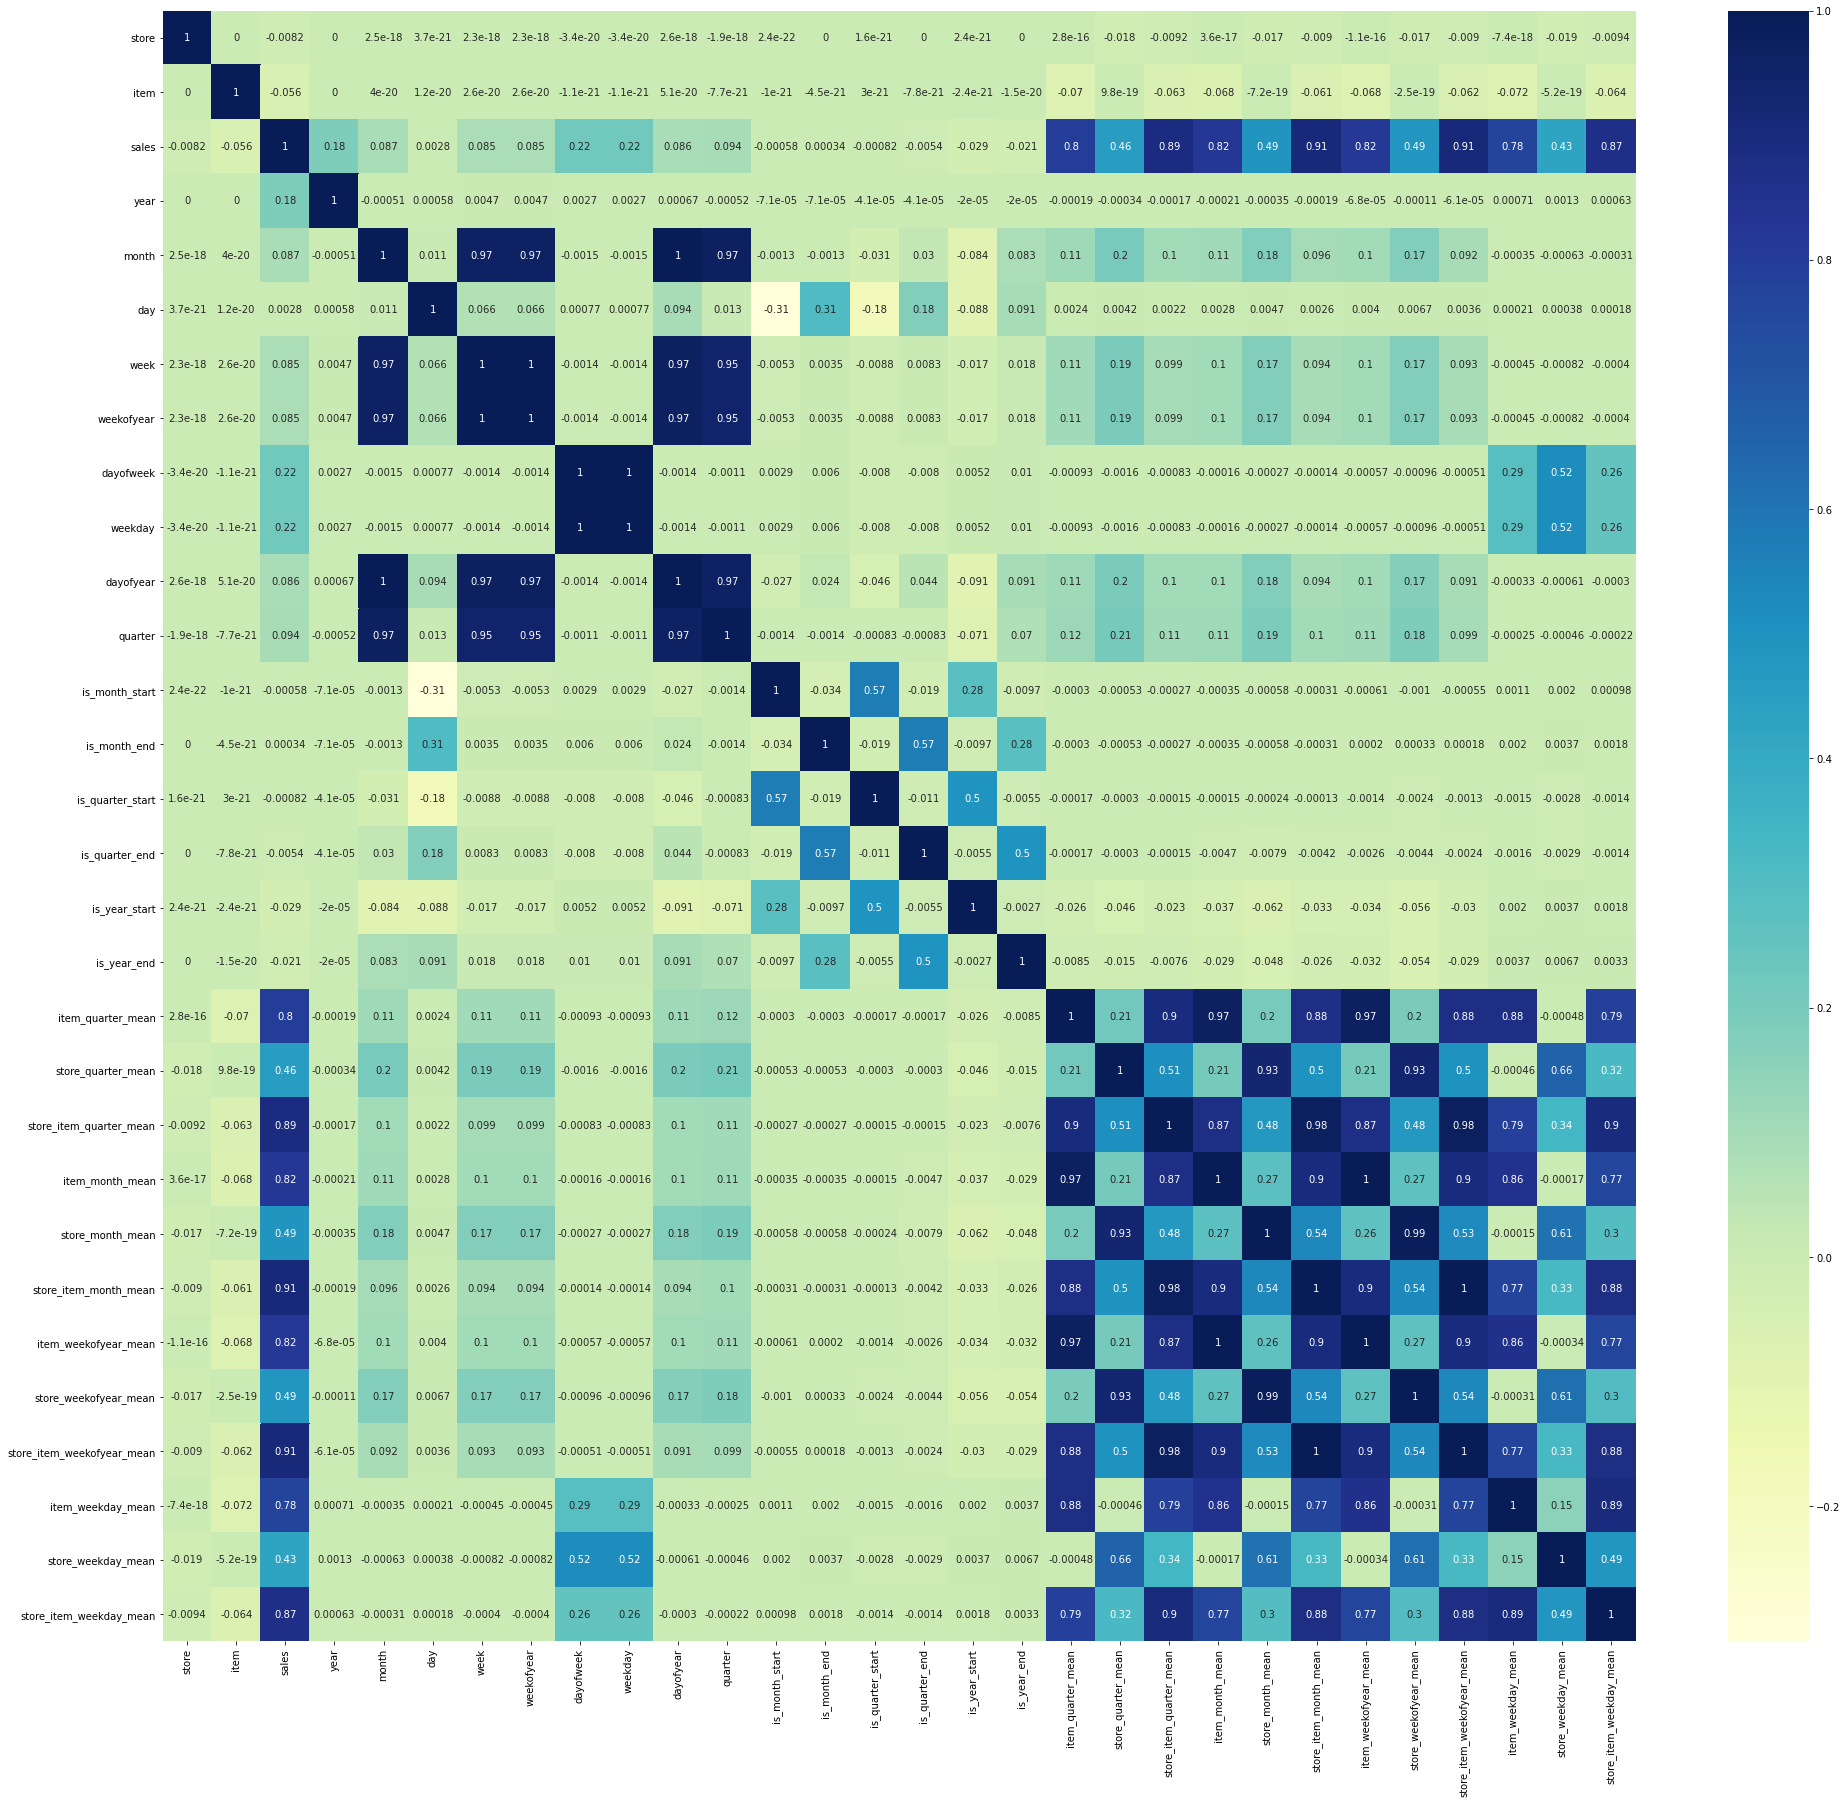

In [15]:
plt.figure(figsize=(33,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [16]:
Y = df['sales']
X = df.drop(columns='sales',axis = 1)

In [17]:
X.head()

,store,item,year,month,day,week,weekofyear,dayofweek,weekday,dayofyear,...,store_item_quarter_mean,item_month_mean,store_month_mean,store_item_month_mean,item_weekofyear_mean,store_weekofyear_mean,store_item_weekofyear_mean,item_weekday_mean,store_weekday_mean,store_item_weekday_mean
0,1,1,2013,1,1,1,1,1,1,1,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,20.279693,43.559923,18.168582
1,1,1,2013,1,2,1,1,2,2,2,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,20.414176,43.838621,18.793103
2,1,1,2013,1,3,1,1,3,3,3,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,21.687356,46.731188,19.452107
3,1,1,2013,1,4,1,1,4,4,4,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,23.245594,49.841379,21.015326
4,1,1,2013,1,5,1,1,5,5,5,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,24.730268,53.129042,22.973180


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   store                       913000 non-null  int64  
 1   item                        913000 non-null  int64  
 2   sales                       913000 non-null  int64  
 3   year                        913000 non-null  int64  
 4   month                       913000 non-null  int64  
 5   day                         913000 non-null  int64  
 6   week                        913000 non-null  int64  
 7   weekofyear                  913000 non-null  int64  
 8   dayofweek                   913000 non-null  int64  
 9   weekday                     913000 non-null  int64  
 10  dayofyear                   913000 non-null  int64  
 11  quarter                     913000 non-null  int64  
 12  is_month_start              913000 non-null  bool   
 13  is_month_end  

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [20]:
scaler = StandardScaler()

In [21]:
X = scaler.fit_transform(X)

In [22]:
X

array([[-1.5666989 , -1.69774938, -1.41479463, ..., -1.42461641,
        -0.70991016, -1.35862969],
       [-1.5666989 , -1.69774938, -1.41479463, ..., -1.41862383,
        -0.68714355, -1.33373384],
       [-1.5666989 , -1.69774938, -1.41479463, ..., -1.36189065,
        -0.45085163, -1.30746338],
       ...,
       [ 1.5666989 ,  1.69774938,  1.41402003, ...,  0.76303388,
         0.80320196,  1.03748094],
       [ 1.5666989 ,  1.69774938,  1.41402003, ...,  0.96432312,
         1.10925847,  1.21999957],
       [ 1.5666989 ,  1.69774938,  1.41402003, ...,  1.15306378,
         1.43747439,  1.42451207]])

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 40)

In [24]:
randomF = RandomForestRegressor()

In [25]:
randomF.fit(X_train,Y_train)

RandomForestRegressor()

In [26]:
randomF.score(X_test,Y_test)

0.9292639121668723